Accessing folder: 75419


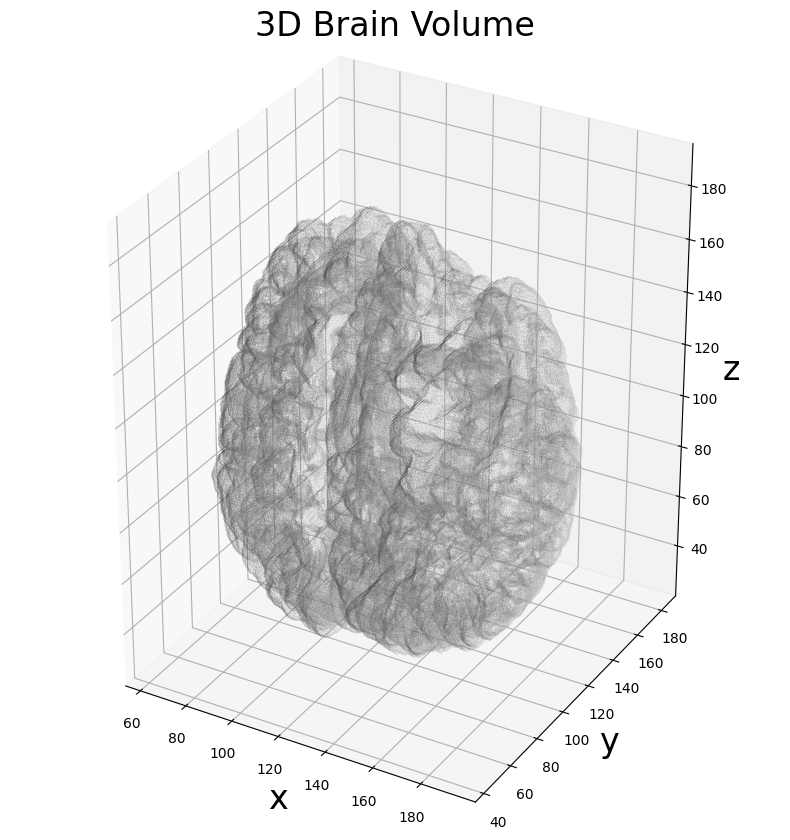

In [106]:
#Here I try accessing the data in an automated way


import os
import numpy as np
from glob import glob
import nibabel as nib
import nibabel.freesurfer.mghformat as mghf # read mgz images
from skimage.morphology import skeletonize_3d
from skimage.measure import marching_cubes
import matplotlib.pyplot as plt
from random import shuffle

# Path to the main directory containing the folders with data
main_directory = "PR-graphomics/sequences/"

# List all subfolders inside the main directory
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]
folders = np.random.permutation(folders)
# Loop through each folder
for folder in folders:
    print(f"Accessing folder: {folder}")
    
    # Construct the path to the current folder
    folder_path = os.path.join(main_directory, folder)
    
     #In this way I add to the address the folder inside the first one
    folder_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    image_path = os.path.join(folder_path, 'aparc.DKTatlas+aseg.deep.mgz')
    vol = mghf.load(image_path)

    # get the volume array
    volume = vol.get_fdata()

    # binarize the volume
    volume = volume != 0

    # extract the 3D mesh of the object for the plot
    verts, faces, normals, values = marching_cubes(volume, 0)

    # plot the results
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    # draw the object volume
    ptx, pty, ptz = verts.T
    ax.plot_trisurf(ptx, pty, faces, ptz, 
                    color='lightgray',
                    alpha=0.05,
                    antialiased=False, 
                    linewidth=0.0
                )
    ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
    ax.set_xlabel('x', fontsize=24)
    ax.set_ylabel('y', fontsize=24)
    ax.set_zlabel('z', fontsize=24)
    _ = ax.set_title('3D Brain Volume', fontsize=24)


    break





    



/tmp/ipykernel_16668/3854808477.py:4: FutureWarning: `skeletonize_3d` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.morphology.skeletonize` instead.
  skeleton = skeletonize_3d(volume)


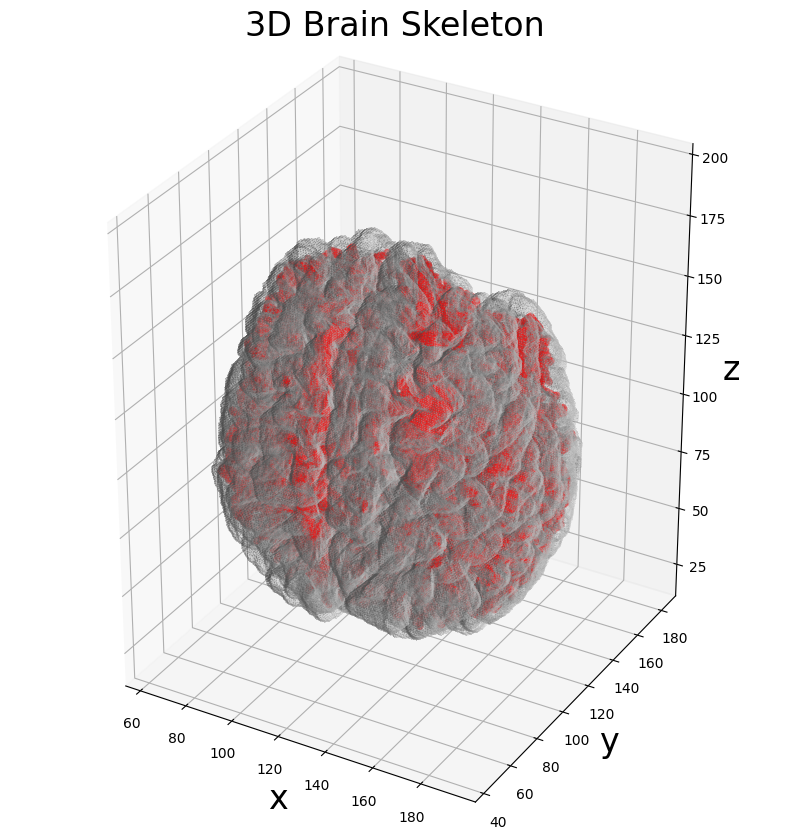

In [110]:
#Prints the skeleton under the brain surface


skeleton = skeletonize_3d(volume)

# plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# draw the skeleton shape
sx, sy, sz = np.where(skeleton)
ax.scatter(sx, sy, sz, color='r', marker='o', s=20, alpha=0.5)
    
# draw the object volume
ptx, pty, ptz = verts.T
ax.plot_trisurf(ptx, pty, faces, ptz, 
                color='lightgray',
                alpha=0.1,
                antialiased=False, 
                linewidth=0.0
               )
ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_zlabel('z', fontsize=24)
_ = ax.set_title('3D Brain Skeleton', fontsize=24)

Accessing folder: 51731


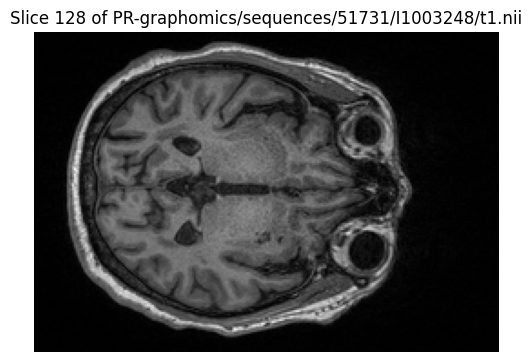

/home/daniele/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/daniele/.local/lib/python3.10/site-packages/nilearn/plotting/find_cuts.py:66: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  warnings.warn(


In [73]:
#Here I print one slice of the T1 image, as well as the full brain reconstruction
from nilearn import plotting



for folder in folders:
    print(f"Accessing folder: {folder}")
    
    # Construct the path to the current folder
    folder_path = os.path.join(main_directory, folder)
    
     #In this way I add to the address the folder inside the first one
    folder_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    image_path = os.path.join(folder_path, 't1.nii')

    img = nib.load(image_path)

    img_data = img.get_fdata()

    # Plot a slice (e.g., middle slice of the 3D image)
    slice_index = img_data.shape[2] // 2  # Get the middle slice along the z-axis

    plt.figure(figsize=(6, 6))
    plt.imshow(img_data[:, :, slice_index], cmap="gray")  # Show the slice in grayscale
    plt.title(f"Slice {slice_index} of {image_path}")
    plt.axis('off')  # Hide axis ticks

    plt.show()
    view = plotting.view_img(img, threshold=None)  # No threshold, show full image

    # Open the interactive plot in the browser
    view.open_in_browser()

    # Or display in a Jupyter notebook (if using one)
    view  # This will display inline in Jupyter notebooks
    break


Accessing folder: 75419
Number of nodes: 1193
Number of edges: 1916


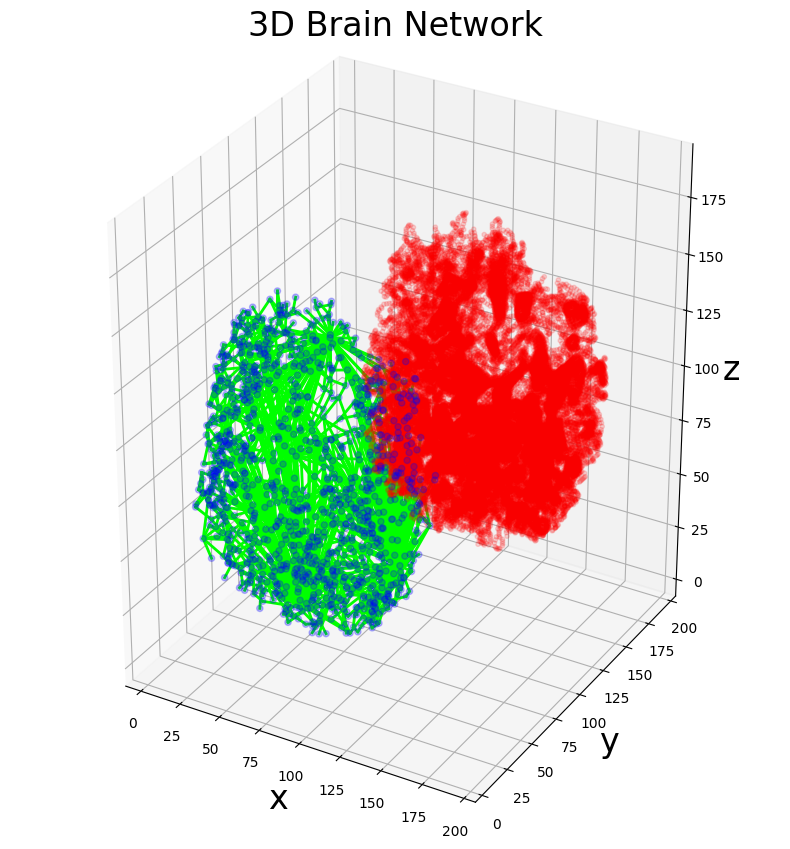

In [107]:
#here I load and print the network
import networkx as nx




for folder in folders:
    print(f"Accessing folder: {folder}")
    
    # Construct the path to the current folder
    folder_path = os.path.join(main_directory, folder)
    
     #In this way I add to the address the folder inside the first one
    folder_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    graph_path = os.path.join(folder_path, 'sk-graph.pickle')

    graph = nx.read_gpickle(graph_path)# plot the results

    print('Number of nodes: {:d}'.format(nx.number_of_nodes(graph)))
    print('Number of edges: {:d}'.format(nx.number_of_edges(graph)))
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    # draw the skeleton shape
    sx, sy, sz = np.where(skeleton)
    ax.scatter(sx, sy, sz, color='r', marker='o', s=10, alpha=0.15)

    # plot the nodes as blue dots
    ax.scatter(*zip(*graph.nodes()), color='b', marker='o', s=20, alpha=0.25)
        
    # plot the edges as lines between vertices
    for ex, ey in graph.edges():
        ax.plot(*zip(*(ex, ey)), color='lime', linewidth=2)
        
        
    ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
    ax.set_xlabel('x', fontsize=24)
    ax.set_ylabel('y', fontsize=24)
    ax.set_zlabel('z', fontsize=24)
    _ = ax.set_title('3D Brain Network', fontsize=24)

    break


Accessing folder: 75419
Number of nodes: 1193
Number of edges: 1916


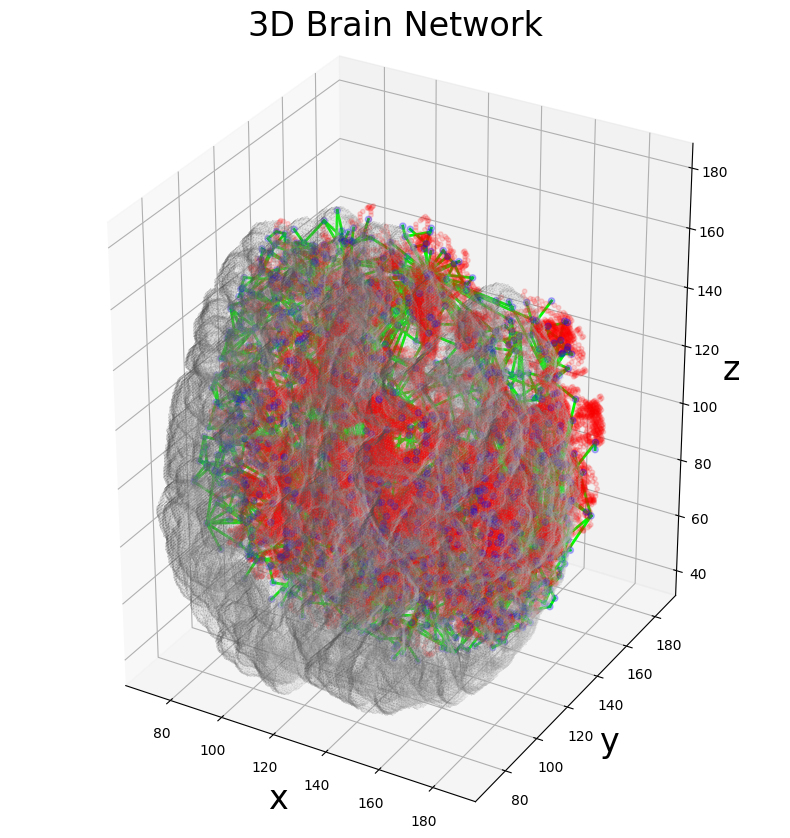

In [108]:
#GPT version of the plot

for folder in folders:
    print(f"Accessing folder: {folder}")
    
    # Construct the path to the current folder
    folder_path = os.path.join(main_directory, folder)
    
    # In this way, I add to the address the folder inside the first one
    folder_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    graph_path = os.path.join(folder_path, 'sk-graph.pickle')

    # Load the graph from the pickle file
    graph = nx.read_gpickle(graph_path)

    print('Number of nodes: {:d}'.format(nx.number_of_nodes(graph)))
    print('Number of edges: {:d}'.format(nx.number_of_edges(graph)))

    # Plot the results
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    # Draw the skeleton shape
    sx, sy, sz = np.where(skeleton)  # Assuming skeleton is a 3D array
    ax.scatter(sx, sy, sz, color='r', marker='o', s=10, alpha=0.15)

    # Extract graph node positions and normalize them to fit within the skeleton's coordinate system
    node_positions = np.array(graph.nodes)  # Assuming the nodes have 3D coordinates
    graph_min = node_positions.min(axis=0)
    graph_max = node_positions.max(axis=0)

    # Scale and shift graph nodes to match skeleton bounds
    skeleton_min = np.array([np.min(sx), np.min(sy), np.min(sz)])
    skeleton_max = np.array([np.max(sx), np.max(sy), np.max(sz)])

    # Normalize the graph coordinates to the skeleton range
    normalized_node_positions = (
        (node_positions - graph_min) / (graph_max - graph_min)
    ) * (skeleton_max - skeleton_min) + skeleton_min

    # Plot the normalized nodes as blue dots
    ax.scatter(normalized_node_positions[:, 0], normalized_node_positions[:, 1], normalized_node_positions[:, 2],
               color='b', marker='o', s=20, alpha=0.25)
        
    # Plot the edges as lines between nodes
    for ex, ey in graph.edges():
        ex_pos = normalized_node_positions[list(graph.nodes).index(ex)]
        ey_pos = normalized_node_positions[list(graph.nodes).index(ey)]
        ax.plot(*zip(ex_pos, ey_pos), color='lime', linewidth=2)
        
    # Adjust the axis limits to cover both skeleton and graph
    ax.set_xlim([np.min(sx), np.max(sx)])
    ax.set_ylim([np.min(sy), np.max(sy)])
    ax.set_zlim([np.min(sz), np.max(sz)])

    # Set equal aspect ratio for x, y, and z axes
    ax.set_box_aspect((np.ptp(sx), np.ptp(sy), np.ptp(sz)))


    # draw the object volume
    ptx, pty, ptz = verts.T
    ax.plot_trisurf(ptx, pty, faces, ptz, 
                    color='lightgray',
                    alpha=0.05,
                    antialiased=False, 
                    linewidth=0.0
                )
    ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
    ax.set_xlabel('x', fontsize=24)
    ax.set_ylabel('y', fontsize=24)
    ax.set_zlabel('z', fontsize=24)
    _ = ax.set_title('3D Brain Skeleton', fontsize=24)

    # Set axis labels
    ax.set_xlabel('x', fontsize=24)
    ax.set_ylabel('y', fontsize=24)
    ax.set_zlabel('z', fontsize=24)

    # Set the plot title
    ax.set_title('3D Brain Network', fontsize=24)

    # Show the plot
    plt.show()
    
    break  # Stops after processing the first folder (remove this to process all folders)

Found 18 Louvain communities


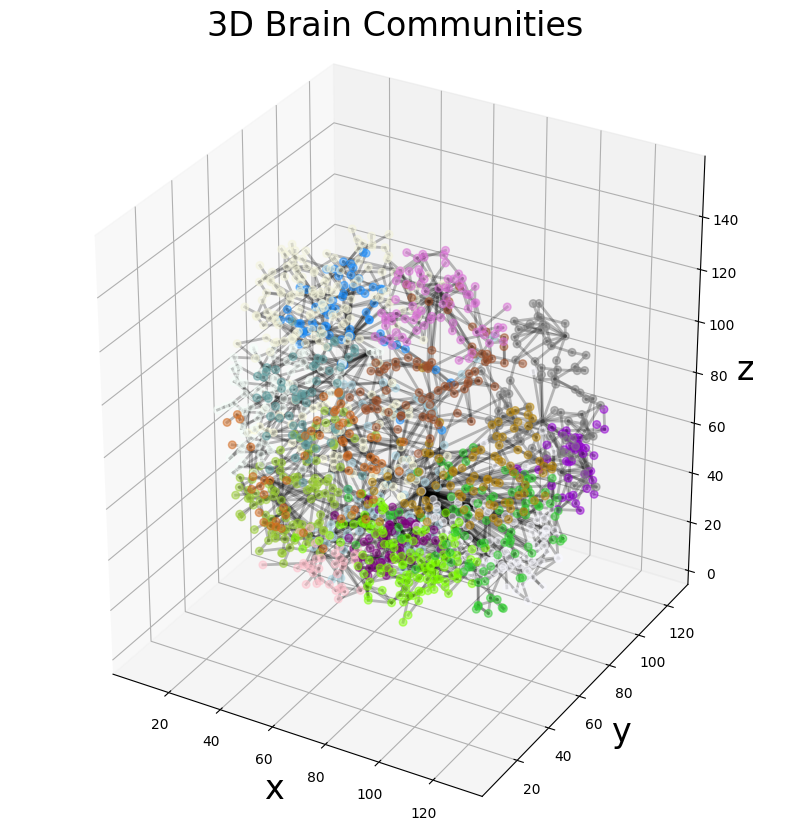

In [76]:
import matplotlib.colors as mcolors

colors = list(mcolors.CSS4_COLORS.keys())
np.random.shuffle(colors)

community = list(nx.community.louvain_communities(graph, seed=42))

print('Found {:d} Louvain communities'.format(len(community)))

# plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# draw the skeleton shape
#sx, sy, sz = np.where(skeleton)
#ax.scatter(sx, sy, sz, color='r', marker='o', s=10, alpha=0.15)

# plot the nodes as blue dots
for com, color in zip(community, colors):
    ax.scatter(*zip(*com), color=color, marker='o', s=30, alpha=0.5)
    
# plot the edges as lines between vertices
for ex, ey in graph.edges():
    ax.plot(*zip(*(ex, ey)), color='k', linewidth=2, alpha=0.25)
    
ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_zlabel('z', fontsize=24)
_ = ax.set_title('3D Brain Communities', fontsize=24)

Found 18 Louvain communities


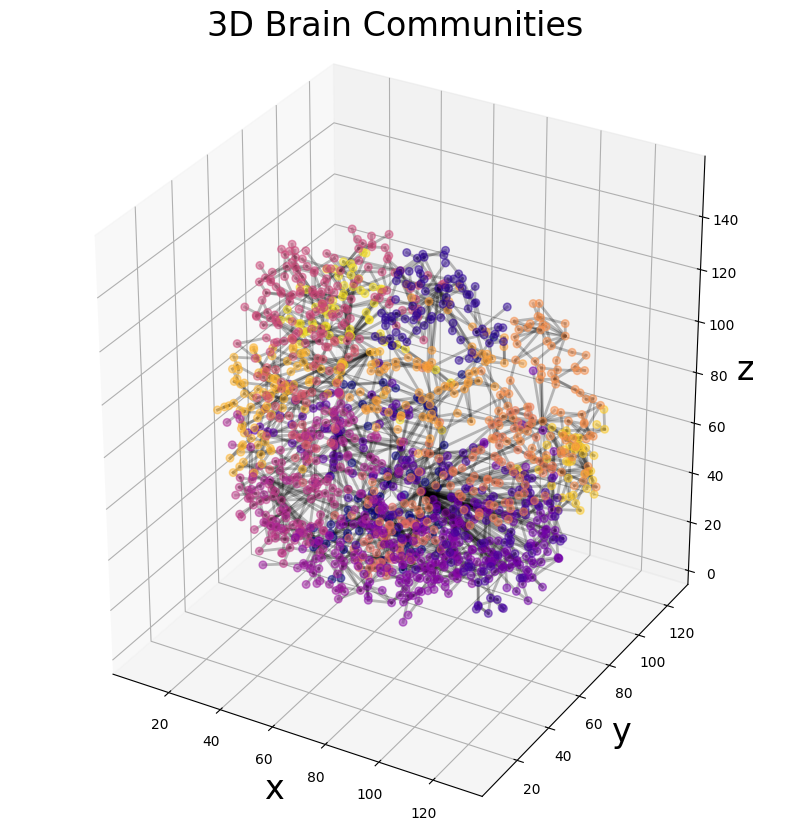

In [77]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import networkx as nx

# Generate communities using Louvain method
community = list(nx.community.louvain_communities(graph, seed=42))
print('Found {:d} Louvain communities'.format(len(community)))

# Get the plasma colormap
plasma = plt.get_cmap('plasma')

# Create a color map for the communities based on the number of communities found
colors = [plasma(i / len(community)) for i in range(len(community))]

# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the nodes using the plasma colors
for com, color in zip(community, colors):
    ax.scatter(*zip(*com), color=color, marker='o', s=30, alpha=0.5)

# Plot the edges as lines between vertices
for ex, ey in graph.edges():
    ax.plot(*zip(*(ex, ey)), color='k', linewidth=2, alpha=0.25)

ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_zlabel('z', fontsize=24)
_ = ax.set_title('3D Brain Communities', fontsize=24)

plt.show()

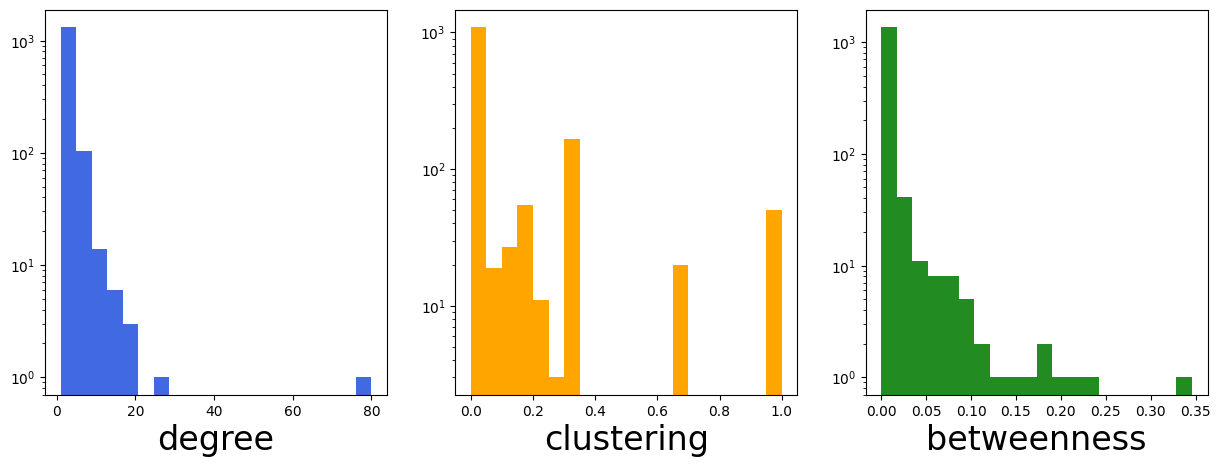

In [78]:
degree = nx.degree(graph)
clustering = nx.clustering(graph)
betweenness = nx.betweenness_centrality(graph)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
_ = ax1.hist(dict(degree).values(), bins=20, color='royalblue')
_ = ax1.set_xlabel('degree', fontsize=24)
_ = ax1.set_yscale('log')
_ = ax2.hist(dict(clustering).values(), bins=20, color='orange')
_ = ax2.set_xlabel('clustering', fontsize=24)
_ = ax2.set_yscale('log')
_ = ax3.hist(dict(betweenness).values(), bins=20, color='forestgreen')
_ = ax3.set_xlabel('betweenness', fontsize=24)
_ = ax3.set_yscale('log')

In [79]:

def prune_leaves(graph):
    """
    Recursively prune leaves (nodes with degree 1) from the graph until the core is reached.
    
    Parameters:
    graph (nx.Graph): A NetworkX graph to prune.
    
    Returns:
    nx.Graph: The core of the graph after pruning all leaves.
    """
    
    # Base case: if no leaves are left (no nodes with degree 1), return the graph
    while True:
        # Find all the leaf nodes (nodes with degree 1)
        leaves = [node for node in graph.nodes() if graph.degree(node) == 1]
        
        # If no leaves are found, the core is reached, stop recursion
        if not leaves:
            break
        
        # Remove the leaves from the graph
        graph.remove_nodes_from(leaves)
    
    return graph

print('Number of nodes: {:d}'.format(nx.number_of_nodes(graph)))
print('Number of edges: {:d}'.format(nx.number_of_edges(graph)))



trial = graph

core = prune_leaves(trial)

periphery_nodes = [x for x in list(graph.nodes()) if x not in list(core.nodes())]
print(periphery_nodes)
print(list(core.nodes()))


Number of nodes: 1443
Number of edges: 2264
[]
[(100.0, 23.0, 76.0), (30.0, 28.0, 88.0), (15.0, 79.0, 99.0), (117.0, 49.0, 105.0), (101.0, 76.0, 31.0), (120.0, 63.0, 62.0), (98.0, 44.0, 142.0), (29.0, 41.0, 83.0), (109.0, 97.0, 68.0), (68.0, 40.0, 64.0), (44.0, 33.0, 119.0), (81.0, 40.0, 136.0), (101.0, 100.0, 100.0), (105.0, 51.0, 25.0), (69.0, 89.0, 46.0), (20.0, 42.0, 98.0), (28.0, 84.0, 90.0), (123.0, 86.0, 82.0), (50.0, 90.0, 14.0), (65.0, 54.0, 39.0), (111.0, 42.0, 57.0), (56.0, 58.0, 144.0), (26.0, 79.0, 103.0), (97.0, 100.0, 23.0), (37.0, 37.0, 57.0), (56.0, 31.0, 46.0), (53.0, 75.0, 116.0), (106.0, 57.0, 25.0), (47.0, 46.0, 67.0), (22.0, 39.0, 61.0), (123.0, 71.0, 80.0), (28.0, 75.0, 98.0), (37.0, 74.0, 60.0), (54.0, 50.0, 89.0), (76.0, 33.0, 92.0), (83.0, 62.0, 22.0), (45.0, 107.0, 27.0), (119.0, 57.0, 96.0), (99.0, 104.0, 27.0), (43.0, 91.0, 26.0), (40.0, 61.0, 122.0), (54.0, 16.0, 68.0), (51.0, 47.0, 38.0), (100.0, 22.0, 78.0), (35.0, 81.0, 83.0), (46.0, 83.0, 24.0), (60.0,

Number of nodes: 1276
Number of edges: 2097
Number of nodes: 1276
Number of edges: 2097
[]
Number of nodes: 0
Number of edges: 0


TypeError: Axes3D.scatter() missing 2 required positional arguments: 'xs' and 'ys'

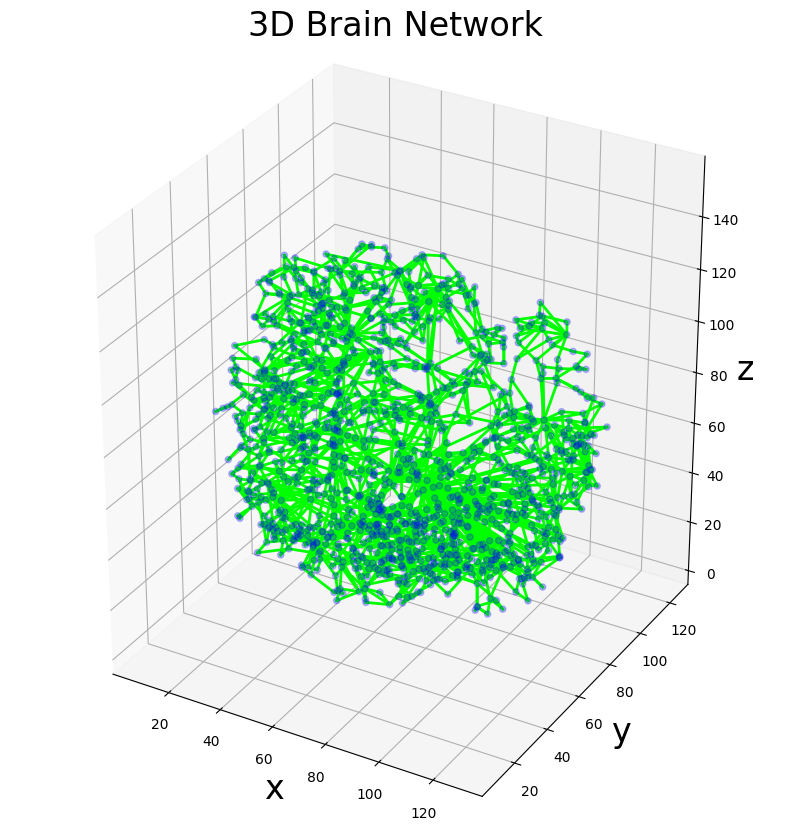

In [80]:


print('Number of nodes: {:d}'.format(nx.number_of_nodes(graph)))
print('Number of edges: {:d}'.format(nx.number_of_edges(graph)))


def prune_leaves(graph):
    """
    Recursively prune leaves (nodes with degree 1) from the graph until the core is reached.
    
    Parameters:
    graph (nx.Graph): A NetworkX graph to prune.
    
    Returns:
    nx.Graph: The core of the graph after pruning all leaves.
    """
    pruned_graph = graph
    # Base case: if no leaves are left (no nodes with degree 1), return the graph
    while True:
        # Find all the leaf nodes (nodes with degree 1)
        leaves = [node for node in pruned_graph.nodes() if pruned_graph.degree(node) == 1]
        
        # If no leaves are found, the core is reached, stop recursion
        if not leaves:
            break
        
        # Remove the leaves from the graph
        pruned_graph.remove_nodes_from(leaves)
    
    return pruned_graph

core = prune_leaves(graph)



print('Number of nodes: {:d}'.format(nx.number_of_nodes(core)))
print('Number of edges: {:d}'.format(nx.number_of_edges(core)))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
# plot the nodes as blue dots
ax.scatter(*zip(*core.nodes()), color='b', marker='o', s=20, alpha=0.25)
        
# plot the edges as lines between vertices
for ex, ey in core.edges():
    ax.plot(*zip(*(ex, ey)), color='lime', linewidth=2)
        
ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_zlabel('z', fontsize=24)
_ = ax.set_title('3D Brain Network', fontsize=24)

periphery_nodes = [x for x in list(graph.nodes()) if x not in list(core.nodes())]
print(periphery_nodes)
periphery = nx.induced_subgraph(graph, periphery_nodes)


print('Number of nodes: {:d}'.format(nx.number_of_nodes(periphery)))
print('Number of edges: {:d}'.format(nx.number_of_edges(periphery)))
# plot the nodes as blue dots
ax.scatter(*zip(*periphery.nodes()), color='r', marker='o', s=20, alpha=0.25)
        
# plot the edges as lines between vertices
for ex, ey in periphery.edges():
    ax.plot(*zip(*(ex, ey)), color='gray', linewidth=2)
        
ax.set_box_aspect((np.ptp(ptx), np.ptp(pty), np.ptp(ptz)))
ax.set_xlabel('x', fontsize=24)
ax.set_ylabel('y', fontsize=24)
ax.set_zlabel('z', fontsize=24)
_ = ax.set_title('3D Brain Network', fontsize=24)